In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Hodgkin-Huxley model
The Hodgkin-Huxley model goes one step further from the LIF model. In addition to a leak of ions through the cell, it implements the following facts.

Fact 1: There are ion specific channels in the neural membrane

Fact 2: Neural firings require Na+ and K+ ions.

Fact 3: These ion specific channels are gated, and the flow of ions through them is regulated based on how open or closed the gates are.

By implementing these biological realisms, Hodgkin and Huxley were able to produce a biophysical model of neuronal spiking, for which they received the nobel price in 1963.

In [2]:
class HHNeuron:
    def __init__(self, Cm, g_Na, g_K, g_L, V_Na, V_K, V_L, V0, m0, h0, n0):
        # Set the parameters of the HH neuron
        self.Cm = Cm      # Membrane capacitance
        self.g_Na = g_Na  # Sodium conductance
        self.g_K = g_K    # Potassium conductance
        self.g_L = g_L    # Leak conductance
        self.V_Na = V_Na  # Sodium reversal potential
        self.V_K = V_K    # Potassium reversal potential
        self.V_L = V_L    # Leak reversal potential
        
        # Set the initial state of the HH neuron
        self.V = V0                  # Initial membrane potential
        self.m = m0                  # Initial m activation variable
        self.h = h0                  # Initial h inactivation variable
        self.n = n0                  # Initial n activation variable
        self.t_last_spike = -np.inf  # Last spike time (initialised to a large negative value)
        self.n_spikes = 0            # Number of spikes (initialised to 0)
        
    def update(self, dt, I):
        # Compute the ionic currents
        I_Na = self.g_Na*self.m**3*self.h*(self.V-self.V_Na)
        I_K = self.g_K*self.n**4*(self.V-self.V_K)
        I_L = self.g_L*(self.V-self.V_L)

        # Compute the steady-state values and time constants of the activation and inactivation variables
        alpha_m = (2.5-0.1*(self.V+65))/(np.exp(2.5-0.1*(self.V+65))-1)
        beta_m = 4*np.exp(-(self.V+65)/18)
        alpha_h = 0.07*np.exp(-(self.V+65)/20)
        beta_h = 1/(np.exp(3-0.1*(self.V+65))+1)
        alpha_n = (0.1-0.01*(self.V+65))/(np.exp(1-0.1*(self.V+65))-1)
        beta_n = 0.125*np.exp(-(self.V+65)/80)
        
        m_inf = alpha_m/(alpha_m+beta_m)
        h_inf = alpha_h/(alpha_h+beta_h)
        n_inf = alpha_n/(alpha_n+beta_n)
        tau_m = 1/(alpha_m+beta_m)
        tau_h = 1/(alpha_h+beta_h)
        tau_n = 1/(alpha_n+beta_n)

        # Update the membrane potential using the HH equation
        dV = (I - I_Na - I_K - I_L)/self.Cm
        self.V += dV*dt

        # Update the activation and inactivation variables using the HH equations
        self.m += (m_inf - self.m)*dt/tau_m
        self.h += (h_inf - self.h)*dt/tau_h
        self.n += (n_inf - self.n)*dt/tau_n

In [3]:
# Create an instance of the HHNeuron class
neuron = HHNeuron(Cm=1, g_Na=120, g_K=36, g_L=0.3, V_Na=60, V_K=-77, V_L=-54.4, V0=-70, m0=0.05, h0=0.54, n0=0.34)

# Set the time step and the time range
dt = 0.01
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []
m = []
h = []
n = []

# Iterate over the time range
for i in range(len(t)):
    I = 10                # Constant current input
    neuron.update(dt, I)  # Update state of the neuron
    V.append(neuron.V)    # Append the membrane potential to the list
    m.append(neuron.m)    # Append the Na activation channel to the list
    h.append(neuron.h)    # Append the Na inactivation channel to the list
    n.append(neuron.n)    # Append the K activation channel to the list

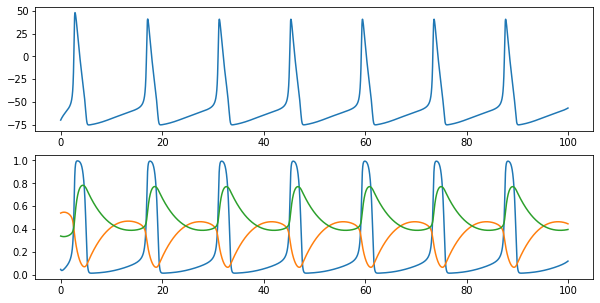

In [6]:
# Plot memebrane potential over time
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,5))
ax1.plot(t,V)
ax2.plot(t,m)
ax2.plot(t,h)
ax2.plot(t,n)
plt.show()